In [52]:
import time
import numpy as np
import pandas as pd
import math
from random import sample
from sklearn.decomposition import PCA
from hicpep import peptools
from matplotlib import pyplot as plt

juicer_pc1 = "/media/jordan990301/Samsung_T5/HiC_Datasets/data_for_hicpep/data_store/data/rao_2014/juicer_outputs/gm12878/1000000/eigenvector/pc1_chr5.txt" 
pearson_path = "/media/jordan990301/Samsung_T5/HiC_Datasets/data_for_hicpep/data_store/data/rao_2014/juicer_outputs/gm12878/1000000/pearsons/pearson_chr5.txt"
possumm_pc1 = "/home/jordan990301/test_code/EigenVector/R/possumm_pc1.txt"

In [53]:
juicer_pc1_df = pd.read_table(juicer_pc1, header=None)
juicer_pc1_np = juicer_pc1_df.values # Turn into numpy format
juicer_pc1_np = juicer_pc1_np.flatten() # Turn into 1D vector
possumm_pc1_df = pd.read_table(possumm_pc1, header=None)
possumm_pc1_np = possumm_pc1_df.values # Turn into numpy format
possumm_pc1_np = possumm_pc1_np.flatten() # Turn into 1D vector

del juicer_pc1_df, possumm_pc1_df

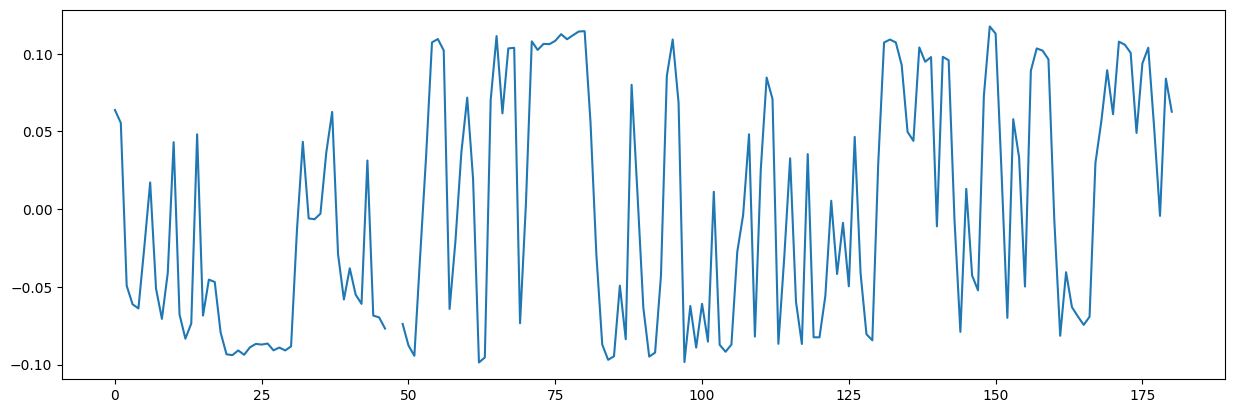

In [54]:
plt.figure().set_figwidth(15)
plt.plot(juicer_pc1_np)

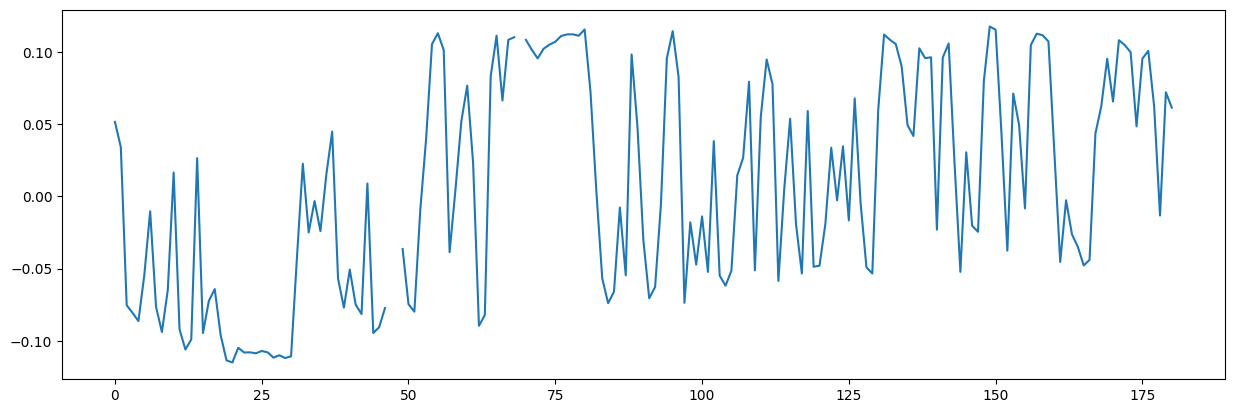

In [60]:
plt.figure().set_figwidth(15)
plt.plot(possumm_pc1_np)

In [56]:
pearson_np = peptools.read_pearson(pearson=pearson_path)

if len(pearson_np) != len(pearson_np[0]):
    print("Pearson matrix has a different number of rows and columns")

pearson_np = pearson_np.astype('float64')
diag = np.diag(pearson_np)
diag_valid = ~np.isnan(diag)
ixgrid = np.ix_(diag_valid, diag_valid) # Record the position of the valid sub-matrix. 
pearson_np = pearson_np[ixgrid]
valid_entry_num = len(pearson_np)

has_nan = np.isnan(pearson_np).any()

if has_nan:
    print("NaN entries still exist in the Pearson matrix.")

start = time.time()
n = len(pearson_np[0])
sample_indexes = sample(list(range(n)), math.floor(n * 0.1))

partial_cov_np = pearson_np @ pearson_np[sample_indexes].T / n
partial_cov_abs_sum = [(index, np.sum(np.abs(row))) for index, row in enumerate(partial_cov_np.T)] 
sorted_partial_cov_abs_sum = sorted(partial_cov_abs_sum, key=lambda x: x[1], reverse=True) # Sorted from the maximum to the minimum 

est_np = np.full(len(diag_valid), np.nan)
est_np[diag_valid] = partial_cov_np.T[sorted_partial_cov_abs_sum[0][0]]

end = time.time()
print(f"Time spent for creating the Estimated PC1-pattern by finding the CxMax in the partial-covariance matrix through sampling (seconds): {end - start}")

Time spent for creating the Estimated PC1-pattern by finding the CxMax in the partial-covariance matrix through sampling (seconds): 0.0009663105010986328


In [57]:
similar_info = peptools.calc_similarity(track1_np=juicer_pc1_np, track2_np=est_np)
print(f"total_entry_num: {similar_info['total_entry_num']}")
print(f"valid_entry_num: {similar_info['valid_entry_num']}")
print(f"similar_num: {similar_info['similar_num']}")
print(f"similar_rate: {np.round(similar_info['similar_rate'], 3)}")

total_entry_num: 181
valid_entry_num: 179
similar_num: 177
similar_rate: 0.989


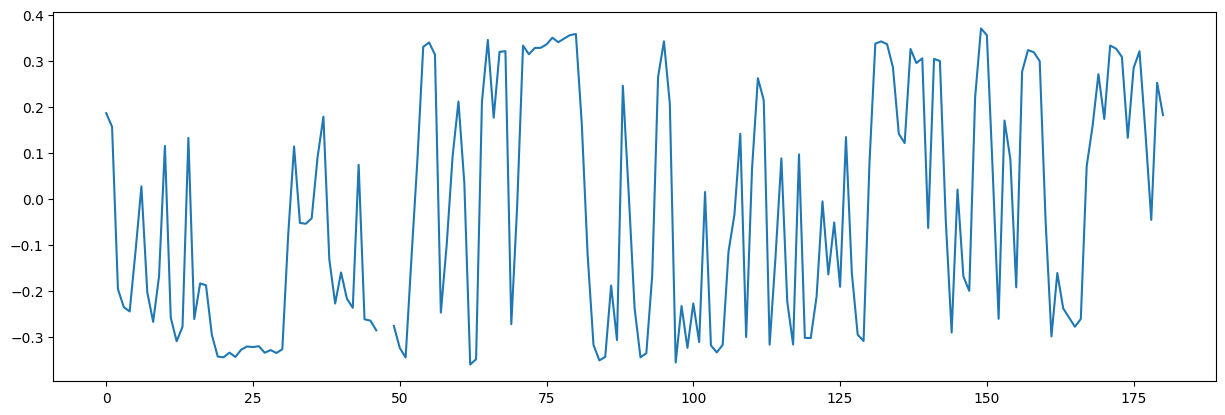

In [58]:
plt.figure().set_figwidth(15)
plt.plot(est_np)

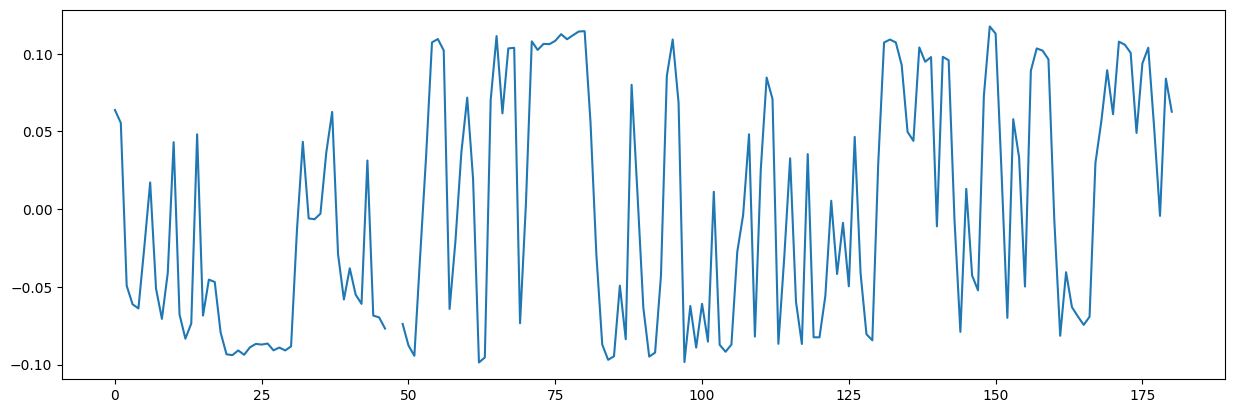

In [59]:
plt.figure().set_figwidth(15)
plt.plot(juicer_pc1_np)